In [1]:
import keras,os
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import warnings 
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"/kaggle/input/dataset-alzheimer/Alzheimer_s Dataset/train"
test_dir = r"/kaggle/input/dataset-alzheimer/Alzheimer_s Dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15, rotation_range=20, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_dataset  = train_datagen.flow_from_directory(directory = train_dir,target_size = (128,128),seed=1,
                                                   class_mode = 'categorical',subset = 'training',batch_size = 32)

valid_dataset = train_datagen.flow_from_directory(directory = train_dir,target_size = (128,128),seed=1,
                                                   class_mode = 'categorical',subset = 'validation',batch_size = 32)

test_dataset = test_datagen.flow_from_directory(directory = test_dir,target_size = (128,128),seed=1,
                                                class_mode = 'categorical',batch_size = 16)

Found 4355 images belonging to 4 classes.
Found 766 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [4]:
import os
from distutils.dir_util import copy_tree, remove_tree

base_dir = r"/kaggle/input/dataset-alzheimer/Alzheimer_s Dataset"
root_dir = "./"
test_dir = os.path.join(base_dir, "train")
train_dir = os.path.join(base_dir, "test")
work_dir = os.path.join(root_dir, "dataset/")

if os.path.exists(work_dir):
    remove_tree(work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [5]:
WORK_DIR = './dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

In [6]:
zoomrange = [.9, 1.0]
brightness = [0.7, 1.3]

work_dr = ImageDataGenerator(rescale = 1./255, brightness_range=brightness, zoom_range=zoomrange, 
                             data_format="channels_last", fill_mode="constant", horizontal_flip=True)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=(128,128), 
                                             batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


In [7]:
train_data_gen.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [8]:
train_data, train_labels = next(train_data_gen)

In [9]:
print(train_data.shape, train_labels.shape)

(6400, 128, 128, 3) (6400, 4)


In [10]:
valid_dataset = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 190 images belonging to 4 classes.


In [11]:
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 128 * 128 * 3), train_labels)
train_data = train_data.reshape(-1, 128, 128, 3)
print(train_data.shape, train_labels.shape)

(12800, 128, 128, 3) (12800, 4)


In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.15, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

Epoch 1/25


I0000 00:00:1732561283.167228     137 service.cc:145] XLA service 0x7b6f94018bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732561283.167287     137 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  7/136 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2427 - loss: 51.5018

I0000 00:00:1732561292.769859     137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


136/136 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.2881 - loss: 50.9657 - val_accuracy: 0.2390 - val_loss: 49.7547
Epoch 2/25
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4117 - loss: 49.5012 - val_accuracy: 0.2348 - val_loss: 48.8713
Epoch 3/25
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5041 - loss: 48.2490 - val_accuracy: 0.3493 - val_loss: 47.6609
Epoch 4/25
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5681 - loss: 47.0310 - val_accuracy: 0.5097 - val_loss: 46.2836
Epoch 5/25
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6077 - loss: 45.8293 - val_accuracy: 0.6595 - val_loss: 44.8935
Epoch 6/25
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6335 - loss: 44.6278 - val_accuracy: 0.7063 - val_loss: 43.6441
Epoch 7/25
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6725 - loss: 43.4157 - val_accuracy: 0.7119 - val_loss: 42.4559
Epoch 8/25
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6858 - loss: 42.2244 - val

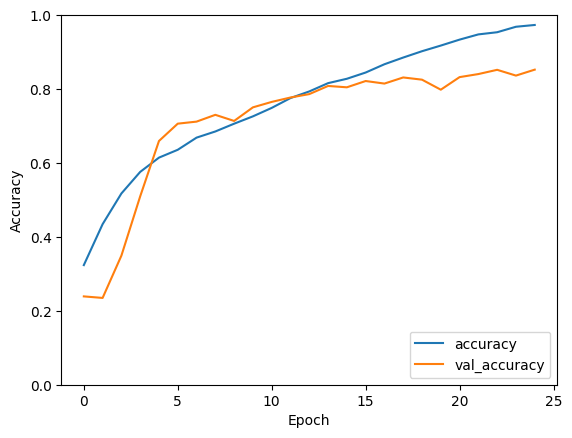

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

alexnet = Sequential()

alexnet.add(Conv2D(96, (11, 11), input_shape=(128, 128, 3), strides=(4, 4), padding='same', kernel_regularizer=l2(0.01)))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(256, (5, 5), padding='same', kernel_regularizer=l2(0.01)))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(256, (3, 3), padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
alexnet.add(BatchNormalization())

# Flatten and Dense Layers
alexnet.add(Flatten())
alexnet.add(Dense(2048, kernel_regularizer=l2(0.01)))
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

alexnet.add(Dense(2048, kernel_regularizer=l2(0.01)))
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

alexnet.add(Dense(1000))
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

alexnet.add(Dense(4))  
alexnet.add(Activation('softmax'))

alexnet.compile(optimizer=Adam(learning_rate=0.00001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = alexnet.fit(train_data, train_labels,
                      validation_data=(val_data, val_labels),
                      epochs=25,
                      batch_size=64,
                      callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final training accuracy: {final_train_accuracy*100:.2f}%")
print(f"Final validation accuracy: {final_val_accuracy*100:.2f}%")

Final training accuracy: 97.33%
Final validation accuracy: 85.25%


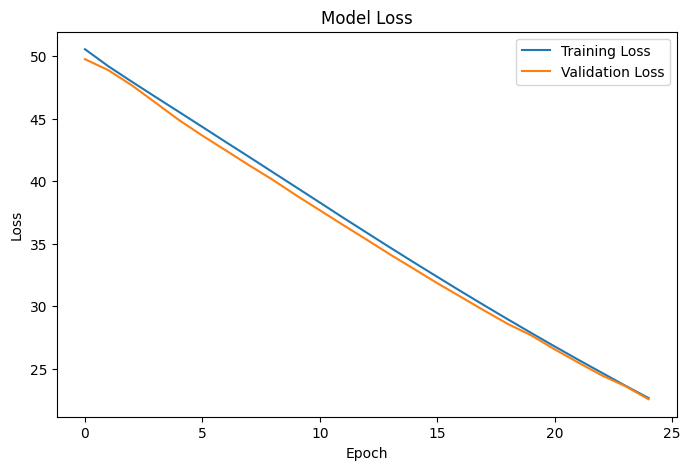

In [16]:


# Plotting Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

predictions = alexnet.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(test_labels, axis=1)

report = classification_report(true_classes, predicted_classes, target_names=CLASSES)
print(report)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
                  precision    recall  f1-score   support

     NonDemented       0.93      0.93      0.93       474
VeryMildDemented       1.00      1.00      1.00       473
    MildDemented       0.73      0.83      0.77       507
ModerateDemented       0.79      0.66      0.72       466

        accuracy                           0.86      1920
       macro avg       0.86      0.86      0.86      1920
    weighted avg       0.86      0.86      0.86      1920



In [22]:
from tensorflow.keras.models import load_model

loaded_model = load_model('alexnet.h5')

In [24]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 18,392,718 (70.16 MB)

 Trainable params: 18,389,964 (70.15 MB)

 Non-trainable params: 2,752 (10.75 KB)

 Optimizer params: 2 (12.00 B)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

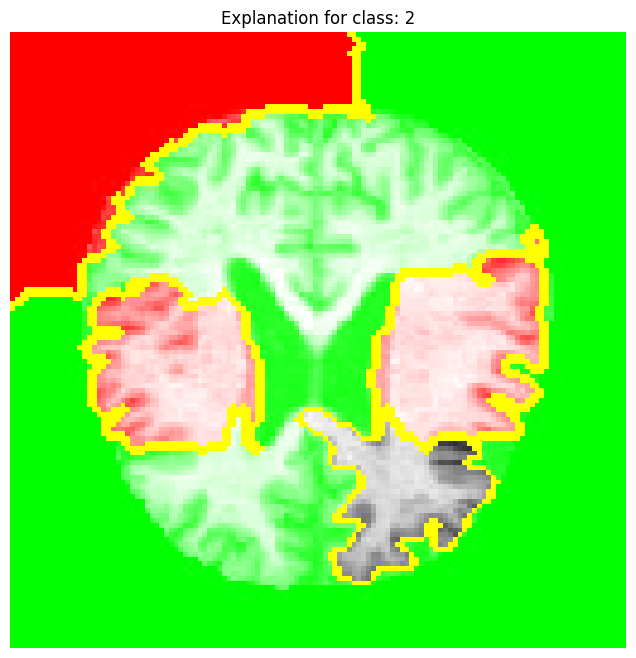

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import AveragePooling2D, Flatten
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

def preprocess_image(img_path, target_size=(128,128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims / 255.0

image_path = r"/kaggle/input/dataset-alzheimer/Alzheimer_s Dataset/test/VeryMildDemented/27 (11).jpg"
preprocessed_img = preprocess_image(image_path)

original_model = load_model('alexnet.h5')

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(preprocessed_img[0].astype('double'), 
                                         classifier_fn=original_model.predict, 
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title(f'Explanation for class: {explanation.top_labels[0]}')
plt.axis('off')
plt.show()